# Capstone Project

## Part 2

### Task 1 - State the different modeling approaches that you will compare to address the business opportunity.

First important point is that the modelling will require time series based modelling. This means that the training data will need features that tell us about the past and future of this data point.

In addtion, the data is strongly biased to the "United Kingdom" due to the prevalence of data there.  When predicting at a country specific level this could strongly impact the results.

Initial models will start out simple, with more complex model types to be build to see if we can build out improvements.

In addition, we will tune hyper parameters of the selected models.

### Task 2: Iterate on your suite of possible models by modifying data transformations, pipeline architectures, hyperparameters and other relevant factors.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import os as os
import sys
import datetime

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import cslib
import model

In [2]:
# Core folders for training data and for dumps of images to be used in reports
IMAGE_DIR = os.path.join("..","images")
TRAIN_DATA_DIR = os.path.join("..","cs-train")

In [3]:
df_ts = cslib.fetch_ts(TRAIN_DATA_DIR)

... loading ts data from files


In [4]:
results = model.model_train(TRAIN_DATA_DIR, True)

... test flag on
...... subseting data
...... subseting countries
... loading ts data from files


/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


... saving test version of model: models/test-all-0_1.joblib


/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


... saving test version of model: models/test-united_kingdom-0_1.joblib
[['all', 56107.0, {'rf__criterion': 'mse', 'rf__n_estimators': 20}], ['united_kingdom', 32951.0, {'rf__criterion': 'mae', 'rf__n_estimators': 20}]]


/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [5]:
results

[['all', 56107.0, {'rf__criterion': 'mse', 'rf__n_estimators': 20}],
 ['united_kingdom', 32951.0, {'rf__criterion': 'mae', 'rf__n_estimators': 20}]]

### Task 3 - Re-train your model on all of the data using the selected approach and prepare it for deployment.


Done

### Task 4 - Articulate your findings in a summary report.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import os as os
import sys
import datetime
import ast

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import cslib
import model

IMAGE_DIR = os.path.join("..","images")

In [2]:
training_log_path = os.path.join('..', 'logs', 'train-test.log')

In [27]:
df = pd.read_csv(training_log_path, delimiter=',', quotechar="|")

In [8]:
df[df.tag=='all']

,unique_id,timestamp,tag,date_range,error_result,best_params,model_version,model_version_note,runtime
3,5d320e12-354b-4442-951d-8ce383166d9b,1.609407e+09,all,"('2017-11-29', '2019-05-31')",{'rmse': 15325.0},"{'rf__criterion': 'mse', 'rf__n_estimators': 10}",0.1,supervised learing model for time-series,000:00:10
14,ca16fb7f-ba63-4e60-a43f-ed0ec21f2084,1.609407e+09,all,"('2017-11-29', '2019-05-31')",{'rmse': 55559.0},{},0.2,second model attempt using LinearRegression,000:00:04
25,532c81c5-d559-435a-8386-8908dab90a4b,1.609407e+09,all,"('2017-11-29', '2019-05-31')",{'rmse': 84187.0},"{'svr__epsilon': 0.5, 'svr__kernel': 'poly'}",0.3,third model attempt using Suppport Vector Regr...,000:00:05
36,9cd19594-ffc4-46a1-b677-0da95c611d05,1.609408e+09,all,"('2017-11-29', '2019-05-31')",{'rmse': 84187.0},"{'svr__epsilon': 0.5, 'svr__kernel': 'poly'}",0.3,third model attempt using Suppport Vector Regr...,000:00:05
47,f913ea38-8eb5-4125-b28f-1de02c0c2ec6,1.609408e+09,all,"('2017-11-29', '2019-05-31')",{'rmse': 70361.0},"{'br__max_features': 1, 'br__max_samples': 3, ...",0.4,fourth model attempt using a Bagging Regressor,000:00:05
58,b829331b-f0df-4c1a-9db1-0a7574dd5779,1.609408e+09,all,"('2017-11-29', '2019-05-31')",{'rmse': 204420.0},{},0.5,shift to simple neural network,000:00:06


In [41]:
# Convert error result to dictionary
rmse_list = []

for i in range(0, len(df.error_result)):
    rmse_list.append(ast.literal_eval(df.error_result[i])['rmse'])
    
    
se = pd.Series(rmse_list)
df['rsme'] = se.values

66
66
(66, 10)


[110.0,
 186.0,
 1912.0,
 15325.0,
 610.0,
 65.0,
 515.0,
 2993.0,
 21597.0,
 965.0,
 152.0,
 327.0,
 754.0,
 3227.0,
 55559.0,
 971.0,
 374.0,
 902.0,
 4238.0,
 52975.0,
 1661.0,
 1443.0,
 345.0,
 957.0,
 3871.0,
 84187.0,
 1076.0,
 411.0,
 886.0,
 4652.0,
 83367.0,
 2901.0,
 1626.0,
 345.0,
 957.0,
 3871.0,
 84187.0,
 1076.0,
 411.0,
 886.0,
 4652.0,
 83367.0,
 2901.0,
 1626.0,
 345.0,
 1061.0,
 3594.0,
 70361.0,
 1056.0,
 396.0,
 939.0,
 4115.0,
 80119.0,
 1751.0,
 1680.0,
 736.0,
 1263.0,
 5996.0,
 204420.0,
 2215.0,
 427.0,
 2470.0,
 4653.0,
 185915.0,
 2974.0,
 1739.0]

In [45]:
df[["error_result","rsme"]]

,error_result,rsme
0,{'rmse': 110.0},110.0
1,{'rmse': 186.0},186.0
2,{'rmse': 1912.0},1912.0
3,{'rmse': 15325.0},15325.0
4,{'rmse': 610.0},610.0
...,...,...
61,{'rmse': 2470.0},2470.0
62,{'rmse': 4653.0},4653.0
63,{'rmse': 185915.0},185915.0
64,{'rmse': 2974.0},2974.0


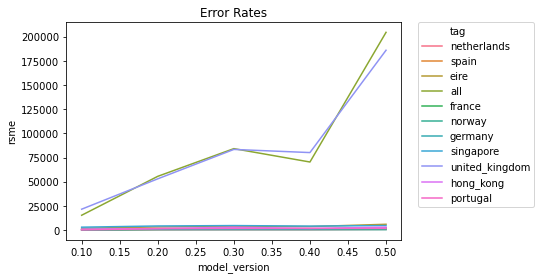

In [49]:
fig = sns.lineplot(data=df, y='rsme', x='model_version', hue='tag' )
image_path = os.path.join(IMAGE_DIR,"Error_Rates.png")
fig.set_title("Error Rates")
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.get_figure().savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=200)

In [57]:
df_small_countries = df[(df.tag != 'all') & (df.tag != 'united_kingdom')]

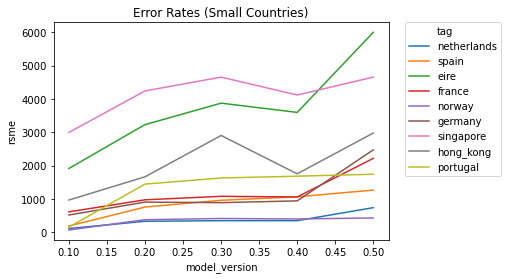

In [58]:
fig = sns.lineplot(data=df_small_countries, y='rsme', x='model_version', hue='tag' )
image_path = os.path.join(IMAGE_DIR,"Error_Rates_SC.png")
fig.set_title("Error Rates (Small Countries)")
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.get_figure().savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=200)

See attached PDF